# Developing an algorithm to assess the relationship between nucleotide sequence complexity and GC content

In this module we will be developing a simple algorithm for assessing the complexity of a nucleotide sequence and its relation to the GC content. The algorithm score is comprised of a scoring system that takes into account the total number of unique sub-strings within a nucleotide sequence, as well as the number of repeat sequences that are generated using Python regex. 

In [1]:
import re
from itertools import permutations
import pandas as pd
import matplotlib.pyplot as plt

Using Python regex a fasta sequence file can be parsed and the separation of the sequence header and the actual nucleotide sequence can be achieved. 

In [2]:
fasta_file = "path_to_bacterial_sequence/sequences.fa"
readfile = open(fasta_file, "r")
# enable the parsers to read the file
read = readfile.read()

# regex to find any multi-line piece of text that contains only ATCG characters, which
# stops at the headers that contain multi-character inputs other than nucleotides
sequences = re.findall(r"((?:[ATGC]+\n)+)", read)
# verify the number of nucleotide sequences in the provided file
print(len(sequences))

100


The length of each nucleotide sequence is also retrieved. The length will be used as a normalizing factor for the complexity score.  

In [3]:
sequence_lengths = []
for i in sequences: 
    sequence_lengths.append(len(i))
print(sequence_lengths)

[1009, 1007, 1004, 1003, 1011, 1007, 1003, 1003, 1004, 1003, 1004, 1008, 1005, 1003, 1003, 1003, 1004, 1013, 1012, 1004, 1003, 1003, 1006, 1003, 1003, 1004, 1006, 1004, 1008, 1003, 1011, 1006, 1003, 1006, 1008, 1004, 1006, 1003, 1006, 1003, 1003, 1004, 1004, 1003, 1004, 1008, 1003, 1012, 1008, 1003, 1006, 1004, 1004, 1008, 1003, 1003, 1003, 1006, 1011, 1003, 1008, 1003, 1004, 1005, 1004, 1005, 1004, 1003, 1003, 1003, 1003, 1006, 1003, 1004, 1008, 1003, 1003, 1004, 1007, 1012, 1004, 1003, 1003, 1004, 1003, 1004, 1012, 1003, 1003, 1003, 1004, 1004, 1003, 1003, 1006, 1010, 1003, 1003, 1006, 1008]


For each sequence, the GC content, expressed as the percentage of total bases that are either G or C, is computed. GC content is often an important indicator of sequence complexity and stability. 

In [4]:
gc_content = []
for i in sequences: 
    gc_content.append(100 * (i.count("C") + i.count("G")) / len(i))

print(gc_content)

[54.112983151635284, 57.00099304865938, 56.77290836653386, 56.530408773678964, 57.467853610286845, 56.30585898709037, 57.82652043868395, 58.22532402791625, 56.17529880478088, 56.530408773678964, 56.374501992031874, 57.44047619047619, 57.014925373134325, 58.8235294117647, 56.03190428713859, 56.63010967098704, 57.17131474103586, 53.603158933859824, 58.794466403162055, 58.864541832669325, 53.33998005982054, 56.82951146560319, 54.97017892644135, 58.4247258225324, 58.22532402791625, 56.47410358565737, 60.536779324055665, 56.374501992031874, 56.6468253968254, 58.4247258225324, 57.467853610286845, 56.36182902584493, 57.926221335992025, 55.46719681908549, 56.051587301587304, 56.87250996015936, 58.05168986083499, 55.932203389830505, 57.05765407554672, 56.63010967098704, 56.03190428713859, 58.96414342629482, 56.57370517928287, 56.63010967098704, 55.278884462151396, 57.242063492063494, 56.33100697906281, 57.608695652173914, 54.464285714285715, 55.932203389830505, 58.34990059642147, 56.57370517928

Similarly to the nucleotide sequence, regex is used to retrieve the sequence headers. 

In [5]:
sequence_identifiers = re.findall("Sequence.+", read)
sequence_identifiers = [int(s.strip('Sequence_')) for s in sequence_identifiers]

In order to develop a scoring system for sequence complexity, we first generate the total number of unique sub-sequences or all lengths for each of the sequences in the fasta file. These values should assist in representing the amount of sequence complexity, where sequences with higher number of unique sub-strings will have greater complexity. 

In [6]:
def generate_substring_set(word, N):
    return set([word[i : j + 1] for i in range(N) for j in range(i, N)])

In [7]:
unique_occurrences = []
for i in sequences: 
    unique_occurrences.append(len(generate_substring_set(i, len(i))))
print(unique_occurrences)

[505402, 503405, 500326, 499353, 507460, 503395, 499315, 499336, 500380, 499362, 500346, 504336, 501369, 499302, 499322, 499351, 500294, 509478, 508414, 500305, 499325, 499323, 502391, 499336, 499361, 500305, 502352, 500370, 504415, 499226, 507460, 502321, 499316, 502321, 504422, 500360, 502288, 499342, 502374, 499295, 499322, 500284, 500332, 499323, 500343, 504391, 499356, 508410, 504369, 499292, 502245, 500344, 500322, 504408, 499312, 499345, 499303, 502359, 507440, 499383, 504285, 499319, 500376, 501364, 500299, 501347, 500361, 499316, 499330, 499323, 499317, 502384, 499297, 500315, 504407, 499261, 499321, 500369, 503429, 508393, 500310, 499324, 499300, 500367, 499369, 500324, 508467, 499330, 499322, 499306, 500367, 500362, 499337, 499315, 502382, 506379, 499305, 499309, 502364, 504369]


In [8]:
full_frame = pd.DataFrame(list(zip(sequence_identifiers,sequence_lengths, gc_content, unique_occurrences)), 
                          columns = ['location', 'length', 'gc_content', "unique_occurrences"])
print(full_frame)

    location  length  gc_content  unique_occurrences
0          1    1009   54.112983              505402
1          2    1007   57.000993              503405
2          3    1004   56.772908              500326
3          4    1003   56.530409              499353
4          5    1011   57.467854              507460
..       ...     ...         ...                 ...
95        96    1010   54.950495              506379
96        97    1003   58.923230              499305
97        98    1003   57.128614              499309
98        99    1006   58.548708              502364
99       100    1008   54.464286              504369

[100 rows x 4 columns]


To assess the number of repetitive elements in each nucleotide sequence, a series of regex patterns are generated for elements of lengths up to 7 bp long. Each sequence is searched for the presence of these elements. In order to identify a repetitive region, the repetitive element must occur at least 4 times in a row. The regex is designed so that all unique permutations of nucleotide sequences that are 1 to 7 bp long will be searched, including repetitive regions of the same nucleotide (i.e. TTTTTTT). 

In [21]:
nucleotides = 'ATCGATCGATCGATCGATCGATCGATCG'   
regex = []
for i in range(1, 7, 1):    
    for j in set(list(permutations(nucleotides, i))): 
        to_find = ''.join([i for i in j])
        regex.append("[{}]{{4,}}|".format(to_find))
final_regex = ''.join([k for k in regex])
print(final_regex)
print(len(regex))

[A]{4,}|[T]{4,}|[G]{4,}|[C]{4,}|[TG]{4,}|[CT]{4,}|[TC]{4,}|[GC]{4,}|[TT]{4,}|[CA]{4,}|[GT]{4,}|[GG]{4,}|[CG]{4,}|[CC]{4,}|[AG]{4,}|[AT]{4,}|[AC]{4,}|[TA]{4,}|[GA]{4,}|[AA]{4,}|[CTT]{4,}|[ATC]{4,}|[CAA]{4,}|[TGT]{4,}|[CCC]{4,}|[GCG]{4,}|[AGA]{4,}|[AGG]{4,}|[CCT]{4,}|[GAT]{4,}|[CAG]{4,}|[ACT]{4,}|[CGG]{4,}|[GCA]{4,}|[ATA]{4,}|[TGC]{4,}|[GGT]{4,}|[TAT]{4,}|[TTA]{4,}|[CGA]{4,}|[CAT]{4,}|[TCT]{4,}|[ATG]{4,}|[GTT]{4,}|[GCC]{4,}|[TCC]{4,}|[TTG]{4,}|[TGG]{4,}|[AGC]{4,}|[GTC]{4,}|[TAC]{4,}|[GCT]{4,}|[CGC]{4,}|[AAT]{4,}|[CTG]{4,}|[CTA]{4,}|[TGA]{4,}|[TTT]{4,}|[TCA]{4,}|[TTC]{4,}|[GTA]{4,}|[GTG]{4,}|[ACA]{4,}|[AAC]{4,}|[GAC]{4,}|[ATT]{4,}|[TCG]{4,}|[CTC]{4,}|[GGG]{4,}|[GGA]{4,}|[TAG]{4,}|[TAA]{4,}|[ACG]{4,}|[CGT]{4,}|[AGT]{4,}|[CAC]{4,}|[CCA]{4,}|[CCG]{4,}|[GAA]{4,}|[ACC]{4,}|[GAG]{4,}|[GGC]{4,}|[AAG]{4,}|[AAA]{4,}|[CGCG]{4,}|[CCAC]{4,}|[AGTA]{4,}|[ATTA]{4,}|[TAGT]{4,}|[AAGT]{4,}|[GGAA]{4,}|[TATG]{4,}|[CCTT]{4,}|[CCAA]{4,}|[CACT]{4,}|[TCAG]{4,}|[TGGC]{4,}|[TGTG]{4,}|[GGCG]{4,}|[GACT]{4,}|[GCAG]{4

The regex pattern is applied to each sequence. The number of occurrences of each repetitive region is tallied for each sequence and merged into a dataframe, where location corresponds to the sequence identifier, and size refers to the number of repetitive occurrences found using the algorithm above. 

In [28]:
repeats_len = []
repeats_indices = []
for i in sequences: 
    find = re.findall(final_regex, i)
    repeats_len.append(len(find))
    repeats_indices.append(sequences.index(i))  

In [29]:
repeats_frame = pd.DataFrame(list(zip(repeats_indices, repeats_len)), columns = ['location', 'size'])
repeats_frame = pd.DataFrame(repeats_frame.groupby(['location'],as_index=False).sum()
                             .sort_values(by='size',ascending=False))
print(repeats_frame)

    location  size
4          4   224
46        48   148
76        79   133
43        45   124
45        47   121
..       ...   ...
84        88    19
78        81    18
72        75    16
89        93    14
47        49    13

[95 rows x 2 columns]


The complexity score is calculated by dividing the number of unique substring occurrences by the number of repetitive elements found using regex, again divided by the sequence length as a normalizing factor. In this manner, higher scores respond to sequences that have a greater number of unique substrings as well as fewer occurrences of repetitive regions. indicating the higher scores correspond to higher predicted complexity. Furthermore the score is reflective of differences in sequence length which might contribute to overall complexity. 

In [30]:
final_frame= repeats_frame.merge(full_frame.set_index('location'), on='location', how='inner')
final_frame['score'] = final_frame['unique_occurrences'] * (final_frame['size']/final_frame['length']) / 1000

A simple scatterplot is used to visualize the relationship between sequence GC content and its complexity score. 

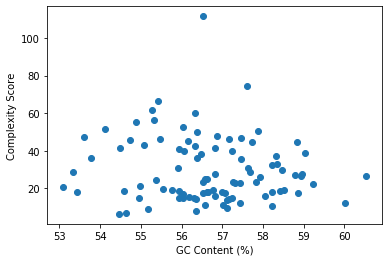

In [31]:
plt.scatter(final_frame.gc_content, final_frame.score)
plt.xlabel("GC Content (%)")
plt.ylabel("Complexity Score")
plt.show()

In [32]:
sorted_frame = pd.DataFrame(final_frame).sort_values(by='gc_content', ascending=False)
sorted_frame.location = sorted_frame.location.astype(str)
sorted_frame.gc_content = sorted_frame.gc_content.round(2)
sorted_frame.score = sorted_frame.score.round(2)
for index, row in sorted_frame.iterrows():
    print("Sequence_{}".format(row['location']))
    print("GC Content: {}%\tComplexity Score: {}".format(row['gc_content'], row['score']))

Sequence_27
GC Content: 60.54%	Complexity Score: 26.47
Sequence_55
GC Content: 60.02%	Complexity Score: 12.45
Sequence_73
GC Content: 59.22%	Complexity Score: 22.4
Sequence_94
GC Content: 59.02%	Complexity Score: 38.83
Sequence_42
GC Content: 58.96%	Complexity Score: 27.9
Sequence_97
GC Content: 58.92%	Complexity Score: 26.88
Sequence_20
GC Content: 58.86%	Complexity Score: 17.44
Sequence_14
GC Content: 58.82%	Complexity Score: 44.8
Sequence_19
GC Content: 58.79%	Complexity Score: 27.13
Sequence_76
GC Content: 58.52%	Complexity Score: 19.41
Sequence_74
GC Content: 58.47%	Complexity Score: 29.9
Sequence_24
GC Content: 58.42%	Complexity Score: 18.92
Sequence_51
GC Content: 58.35%	Complexity Score: 32.95
Sequence_57
GC Content: 58.33%	Complexity Score: 37.34
Sequence_62
GC Content: 58.23%	Complexity Score: 17.92
Sequence_25
GC Content: 58.23%	Complexity Score: 32.36
Sequence_8
GC Content: 58.23%	Complexity Score: 10.95
Sequence_37
GC Content: 58.05%	Complexity Score: 15.98
Sequence_33
GC 

The final output for each sequence is exported into a txt file in the requested format. 

In [27]:
with open("complexity_scores.txt", "w") as handle: 
    for index, row in sorted_frame.iterrows():
        handle.write("Sequence_{}\n".format(row['location']))
        handle.write("GC Content: {}%\tComplexity Score: {}\n".format(row['gc_content'], row['score']))